In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Visualizations 

<AxesSubplot: >

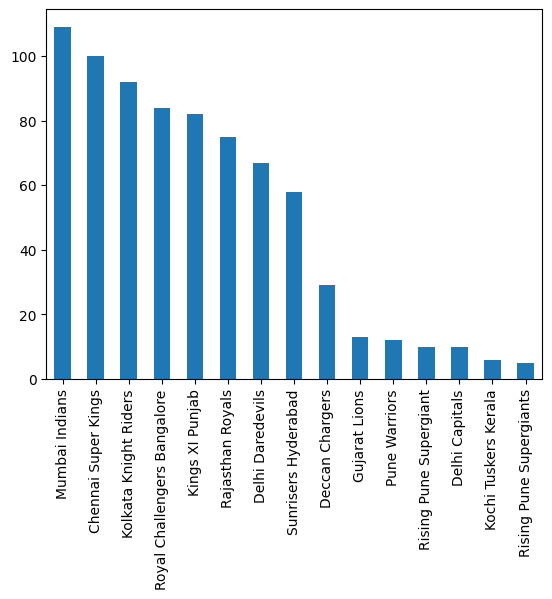

In [6]:
match["winner"].value_counts().plot(kind="bar")

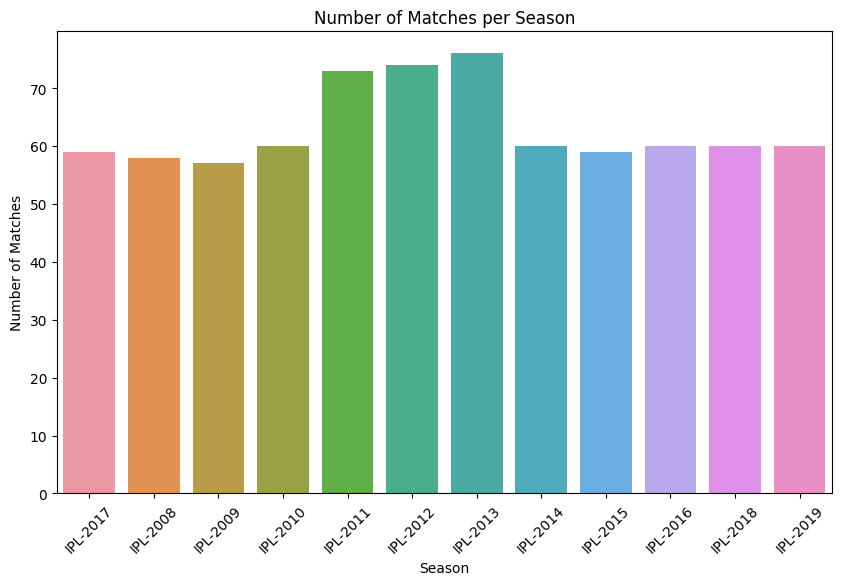

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=match)
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [8]:
match["venue"].nunique()

41

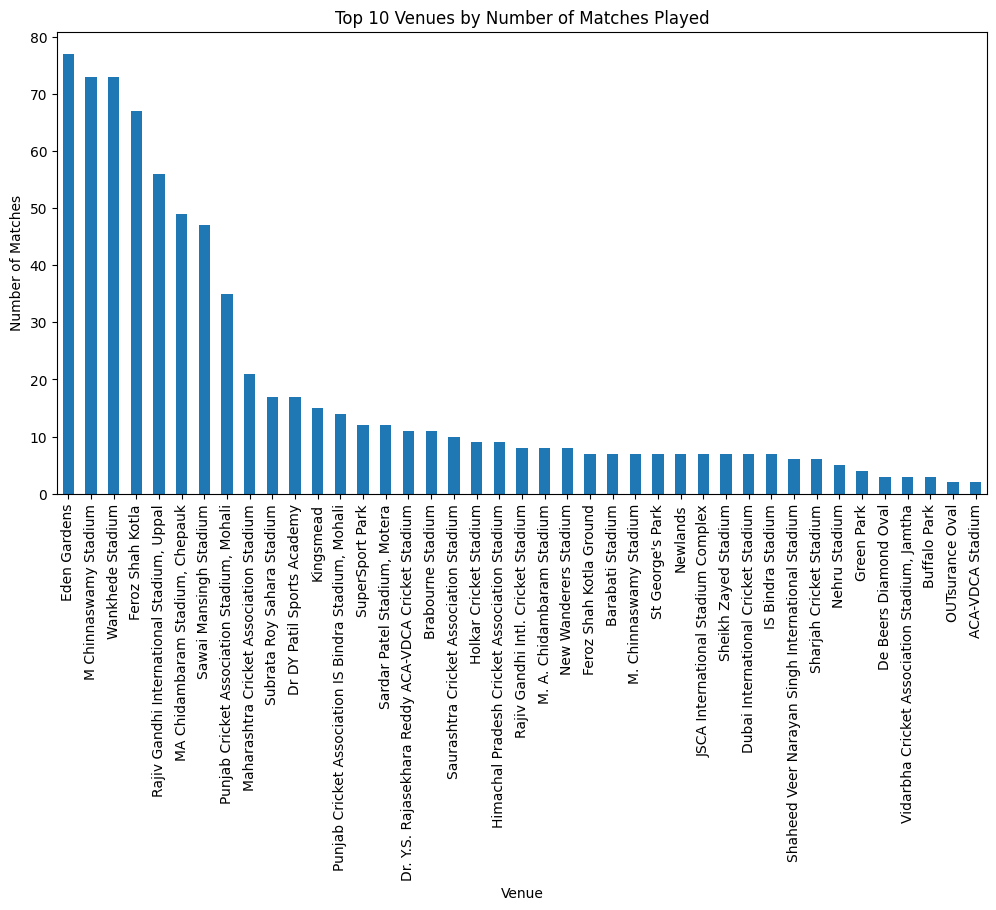

In [9]:
top_venues = match['venue'].value_counts()
plt.figure(figsize=(12, 6))
top_venues.plot(kind='bar')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

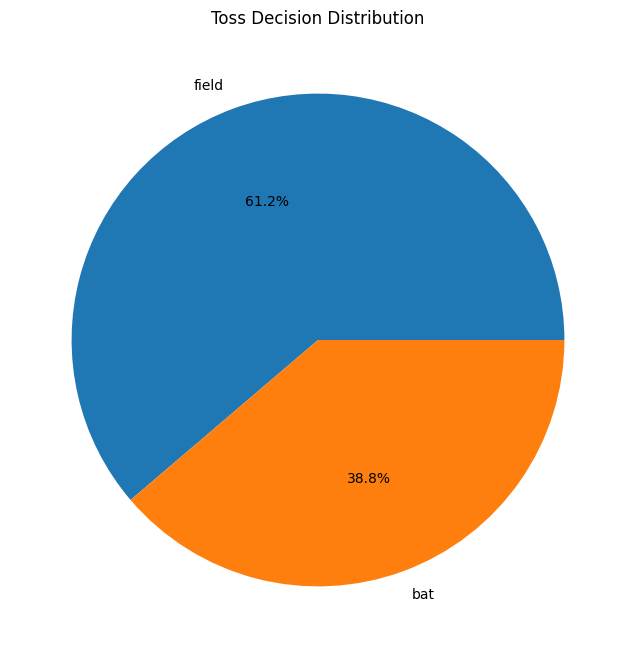

In [10]:
plt.figure(figsize=(8, 8))
match['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.show()

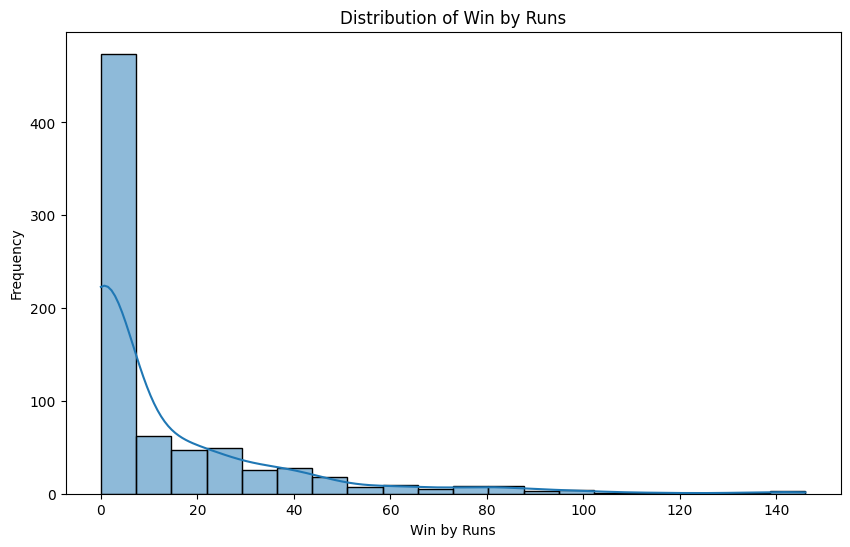

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(match['win_by_runs'], bins=20, kde=True)
plt.title('Distribution of Win by Runs')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.show()

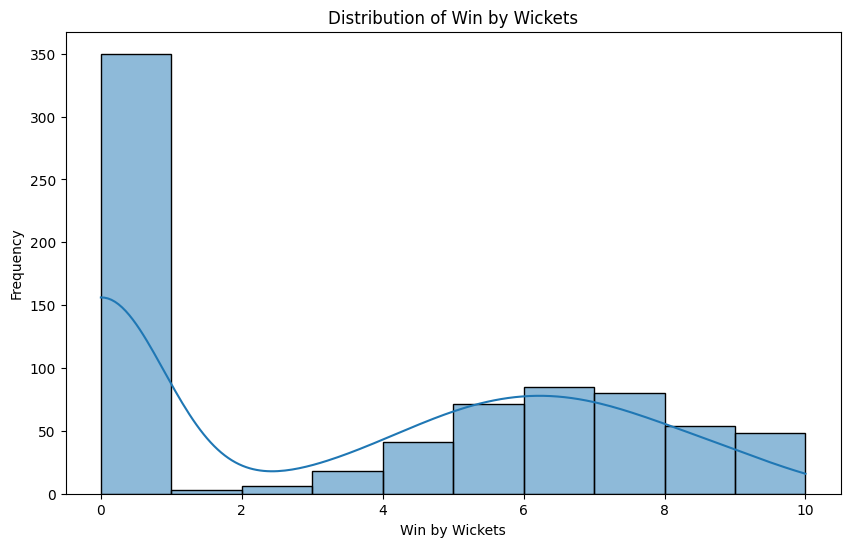

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(match['win_by_wickets'], bins=10, kde=True)
plt.title('Distribution of Win by Wickets')
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.show()

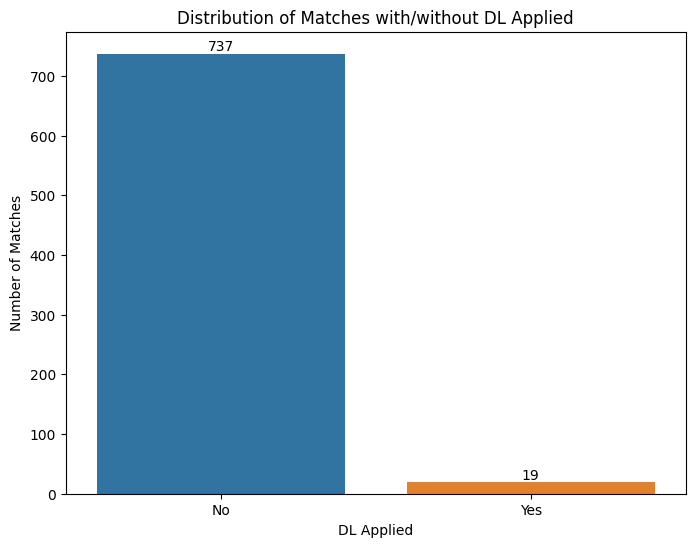

In [13]:
plt.figure(figsize=(8, 6))
dl_counts = match['dl_applied'].value_counts()
sns.countplot(x='dl_applied', data=match)
plt.title('Distribution of Matches with/without DL Applied')
plt.xlabel('DL Applied')
plt.ylabel('Number of Matches')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Annotate the bars with counts
for i, count in enumerate(dl_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')


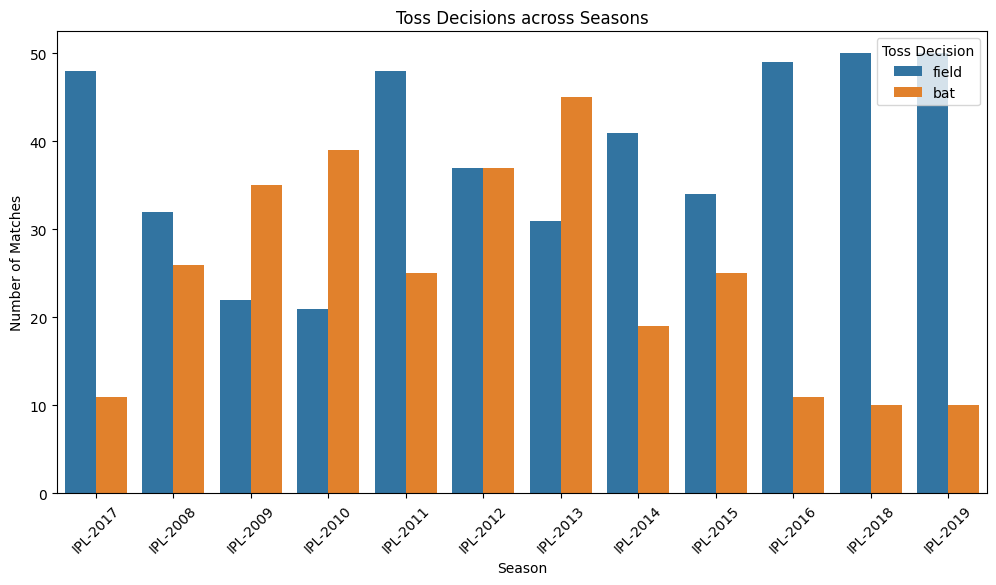

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', hue='toss_decision', data=match)
plt.title('Toss Decisions across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.show()

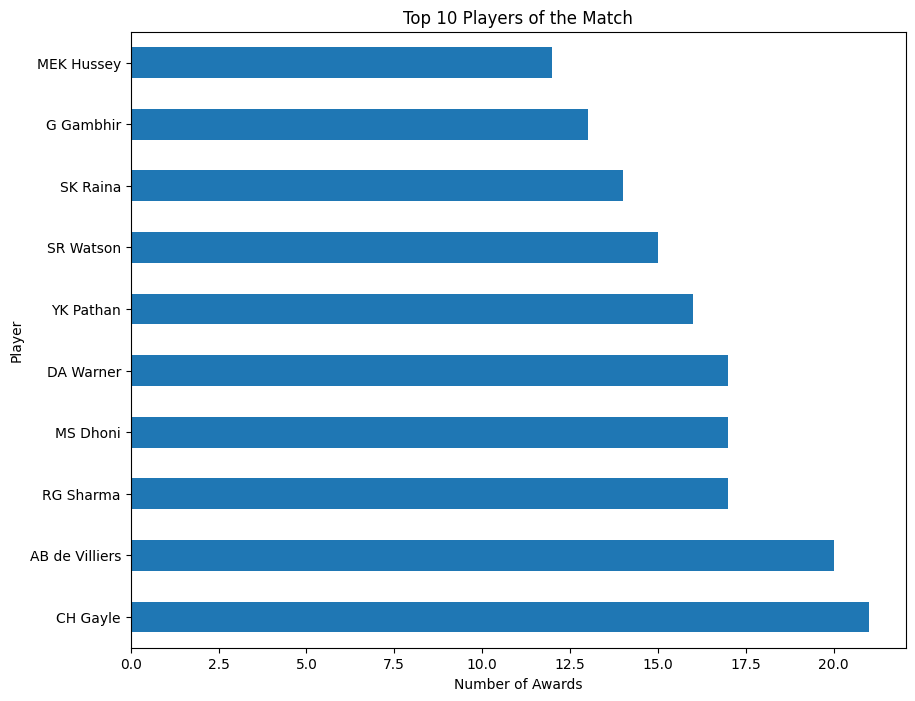

In [15]:
plt.figure(figsize=(10, 8))
top_players = match['player_of_match'].value_counts().head(10)
top_players.plot(kind='barh')
plt.title('Top 10 Players of the Match')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()


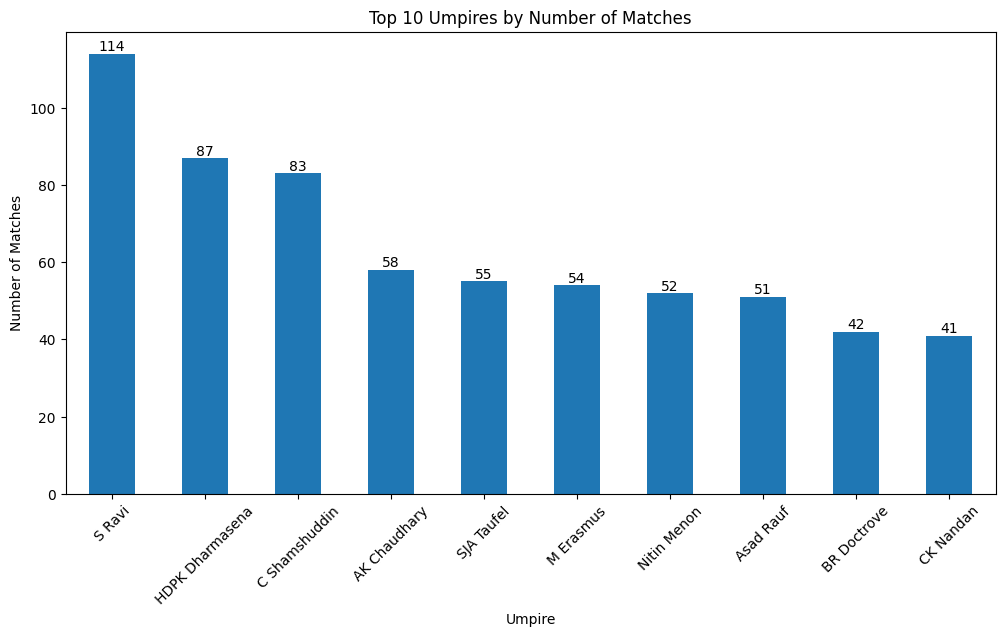

In [16]:
plt.figure(figsize=(12, 6))
umpires = pd.concat([match['umpire1'], match['umpire2'], match['umpire3']]).value_counts().head(10)
umpires.plot(kind='bar')
plt.title('Top 10 Umpires by Number of Matches')
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)

# Annotate the bars with counts
for i, count in enumerate(umpires):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [17]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Feature Engineering

In [18]:
# creating a dataframe which will group the match id and inning and show the total runs scored in both 1st and second innings by aggregatiing each run. 
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\Parth\AppData\Local\Temp\ipykernel_28392\732451747.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [19]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [20]:
# here we are adding two more columns in the match dataframe; match_id and total runs and storing the result in a new dataframe match_df
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [21]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [23]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [24]:
match_df['team1'].nunique()

8

In [25]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [26]:
match_df = match_df[match_df['dl_applied']==0]

In [27]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [28]:
delivery_df =match_df.merge(delivery,on='match_id')

In [29]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [31]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [32]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1

In [33]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [34]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [35]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [36]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [37]:
delivery_df['wickets']=10- wickets

In [38]:
delivery_df[delivery_df['wickets']<10]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
160,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,...,0,0,0,1,bowled,NaN,52,156,86,9
161,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,5,TM Head,...,2,0,2,0,NaN,NaN,54,154,85,9
162,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,6,TM Head,...,0,0,0,0,NaN,NaN,54,154,84,9
163,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,1,CH Gayle,...,0,0,0,0,NaN,NaN,54,154,83,9
164,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,2,CH Gayle,...,6,0,6,0,NaN,NaN,60,148,82,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4


In [39]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [40]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [41]:
delivery_df = delivery_df.reset_index()


In [42]:
delivery_df.head()

,index,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
1,126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
2,127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
3,128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
4,129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [43]:
delivery_df.drop(columns='index',inplace=True)

In [44]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner
            


In [45]:
delivery_df['winner']=is_win(delivery_df)

In [46]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]


In [47]:

final_df =final_df.sample(final_df.shape[0])


In [48]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [49]:
print(final_df.city.unique())
print(final_df.batting_team.unique())


['Hyderabad' 'Bangalore' 'Mumbai' 'Chandigarh' 'Chennai' 'Kolkata' 'Delhi'
 'Jaipur' 'Ahmedabad' 'Pune' 'Centurion' 'Sharjah' 'Port Elizabeth'
 'Bloemfontein' 'Mohali' 'Cuttack' 'Dharamsala' 'Abu Dhabi' 'Durban'
 'Ranchi' nan 'Bengaluru' 'Johannesburg' 'Visakhapatnam' 'Cape Town'
 'Raipur' 'Indore' 'Nagpur' 'Kimberley' 'East London']
['Mumbai Indians' 'Delhi Capitals' 'Royal Challengers Bangalore'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Chennai Super Kings' 'Rajasthan Royals']


In [50]:
final_df.head()

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
45890,493,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,79,56,9,157,7.406250,8.464286,1
8100,104,Delhi Capitals,Royal Challengers Bangalore,Bangalore,13,18,5,154,8.352941,4.333333,1
56751,603,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,108,58,8,194,8.419355,11.172414,0
44347,479,Mumbai Indians,Kings XI Punjab,Mumbai,68,44,7,168,7.973684,9.272727,1
19640,205,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,36,20,7,181,8.760000,10.800000,1


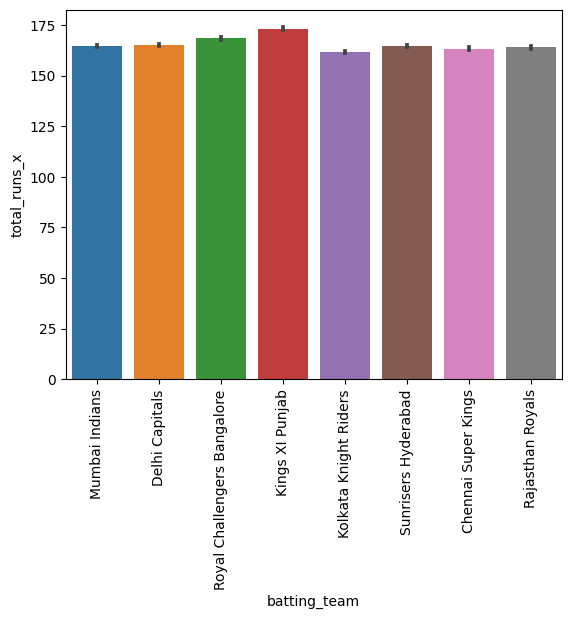

In [51]:
sns.barplot(x=final_df.batting_team,y=final_df.total_runs_x)
plt.xticks(rotation=90)
plt.show()

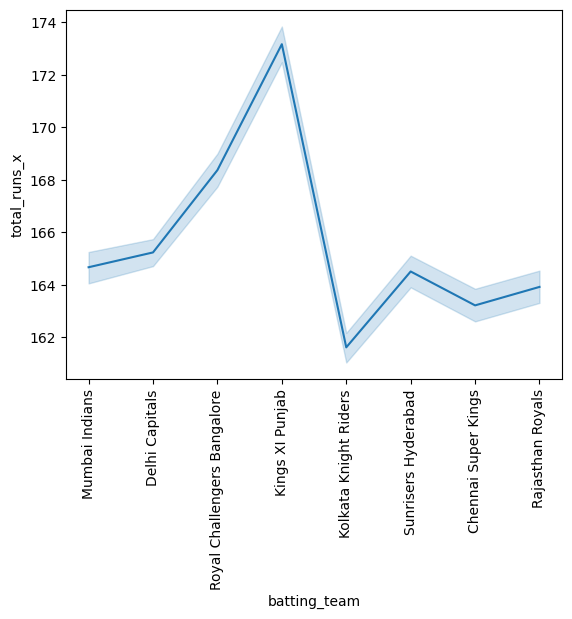

In [52]:
sns.lineplot(x=final_df.batting_team, y=final_df.total_runs_x)
plt.xticks(rotation=90)
plt.show()

c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Parth\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


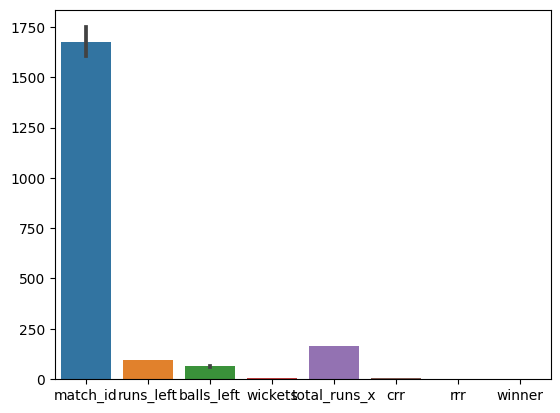

In [53]:
mumbai_df = final_df[final_df["batting_team"]=="Mumbai Indians"]
sns.barplot(mumbai_df)
plt.show()

In [54]:
import matplotlib.pyplot as plt
final_df.columns

Index(['match_id', 'batting_team', 'bowling_team', 'city', 'runs_left',
       'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'winner'],
      dtype='object')

In [55]:
final_df["total_runs_x"].max()
final_df['total_runs_x'].min()

65

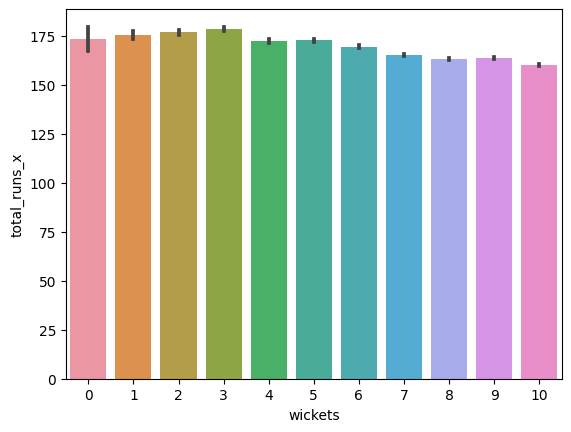

In [56]:
# plt.bar(final_df.crr,final_df.balls_left)
# plt.show()

import seaborn as sns 
sns.barplot(x=final_df.wickets, y=final_df.total_runs_x)
plt.show()

In [57]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city
        

final_df['city']=final_df.apply(fill_city,axis=1)

In [58]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [59]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [61]:

ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [62]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [63]:
y_pred = pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[0.78160859, 0.21839141],
       [0.02306145, 0.97693855],
       [0.46991464, 0.53008536],
       ...,
       [0.75974776, 0.24025224],
       [0.39880034, 0.60119966],
       [0.3523967 , 0.6476033 ]])

In [64]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [65]:
temp_df ,target =match_progression(delivery_df,513,pipe)

Target- 189


Text(0.5, 1.0, 'Target-189')

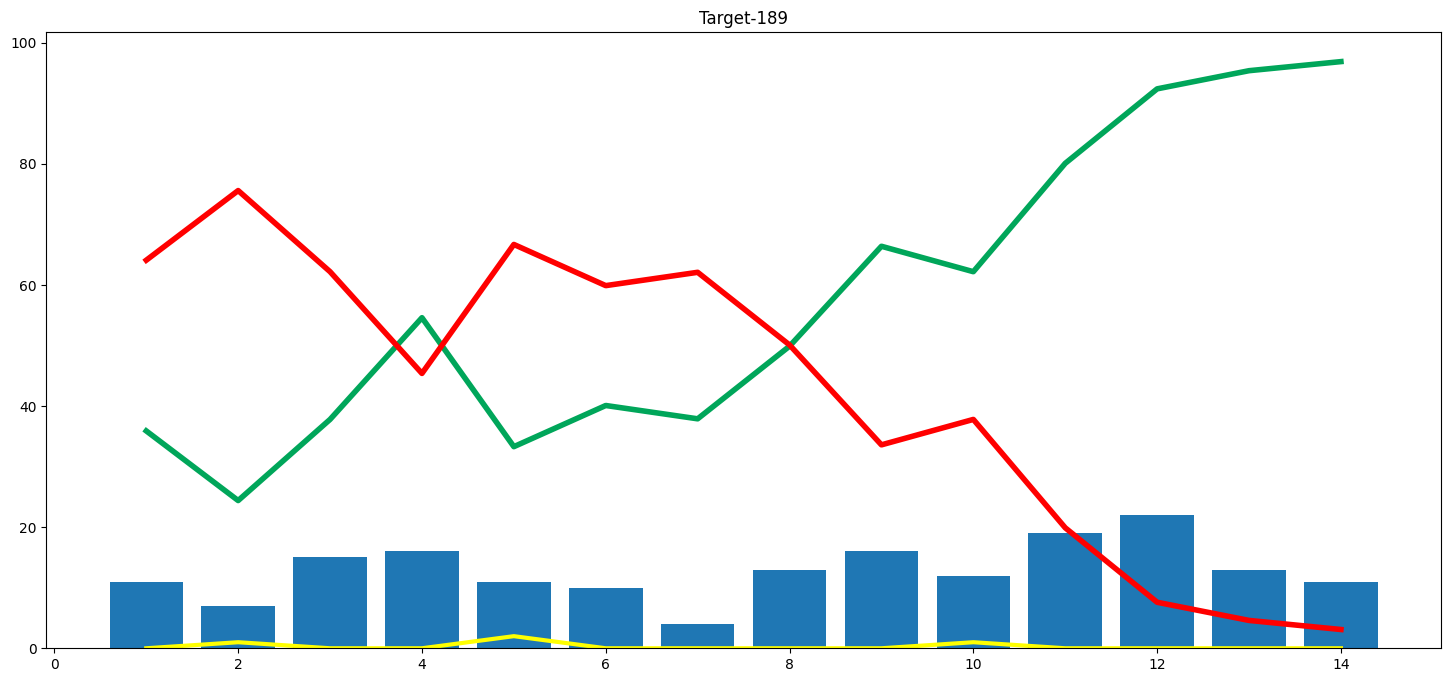

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [67]:

delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [68]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [69]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [70]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
43212,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,72,38,8,184,8.268293,11.368421
57960,Delhi Capitals,Mumbai Indians,Visakhapatnam,98,29,4,206,7.186813,20.275862
69449,Delhi Capitals,Mumbai Indians,Delhi,79,27,5,174,6.193548,17.555556
26065,Chennai Super Kings,Rajasthan Royals,Chennai,7,13,9,147,7.906542,3.230769
34041,Sunrisers Hyderabad,Rajasthan Royals,Hyderabad,42,48,8,126,7.083333,5.250000
...,...,...,...,...,...,...,...,...,...
5618,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,137,98,9,165,7.909091,8.387755
15243,Kolkata Knight Riders,Rajasthan Royals,Durban,65,65,5,101,4.036364,6.000000
47280,Mumbai Indians,Kings XI Punjab,Chandigarh,138,110,10,156,11.400000,7.527273
59690,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,95,81,8,145,7.846154,7.037037
